<a href="https://colab.research.google.com/github/TMhdSofyan/Unsupervised_Learning/blob/main/Phi_Z%20vs%20RQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd

In [42]:
df = pd.read_csv('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/RQI.csv', index_col=0, sep = ';')
df.head()

,Phi_Z,RQI
Index,,
1,0.078749,0.018739
2,0.100110,0.024300
3,0.078749,0.020129
4,0.117318,0.031845
5,0.100110,0.027618


In [43]:
df['RQI'] = np.log(df['RQI'].values).reshape(-1,1)
df['Phi_Z'] = np.log(df['Phi_Z'].values).reshape(-1,1)

In [44]:
df.head()

,Phi_Z,RQI
Index,,
1,-2.541494,-3.977129
2,-2.301486,-3.717277
3,-2.541494,-3.905578
4,-2.142863,-3.446862
5,-2.301486,-3.589281


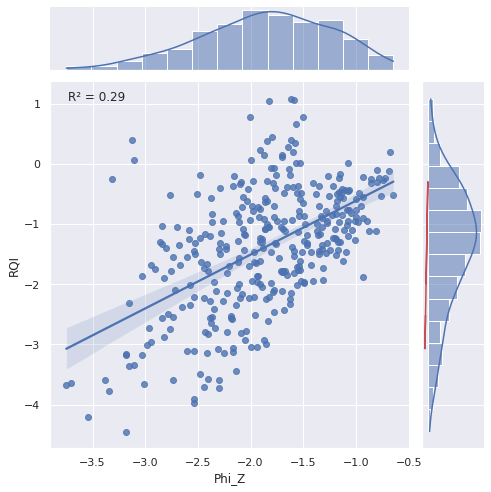

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# create a scatter plot with regression line and score
sns.set(style='darkgrid')
g = sns.jointplot(x='Phi_Z', y='RQI', data=df, kind='reg', height=7)
linreg = LinearRegression()
linreg.fit(df[['Phi_Z']], df[['RQI']])
slope = linreg.coef_[0]
intercept = linreg.intercept_
score = linreg.score(df[['Phi_Z']], df[['RQI']])
text = f"R² = {score:.2f}"
plt.annotate(text, xy=(0.05, 0.95), xycoords=g.ax_joint.transAxes)
plt.plot(df['Phi_Z'], slope*df['Phi_Z']+intercept, color='r')
plt.show()


In [50]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(df)

DBSCAN(eps=1, min_samples=10)

In [52]:
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

Number of clusters: 1


In [19]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

  0%|          | 0/18 [00:00<?, ?it/s]

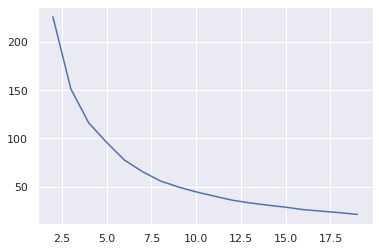

In [54]:
score = []
for k in tqdm(range(2, 20)):
  model = KMeans(n_clusters = k)
  member = model.fit_predict(df)
  score.append(model.inertia_)

plt.plot(range(2, 20), score)

In [58]:
model = KMeans(n_clusters =5)
member = model.fit_predict(df)

In [59]:
df_pred = df.copy()
df_pred['cluster'] = member
df_pred.head()

,Phi_Z,RQI,cluster
Index,,,
1,-2.541494,-3.977129,2
2,-2.301486,-3.717277,2
3,-2.541494,-3.905578,2
4,-2.142863,-3.446862,2
5,-2.301486,-3.589281,2


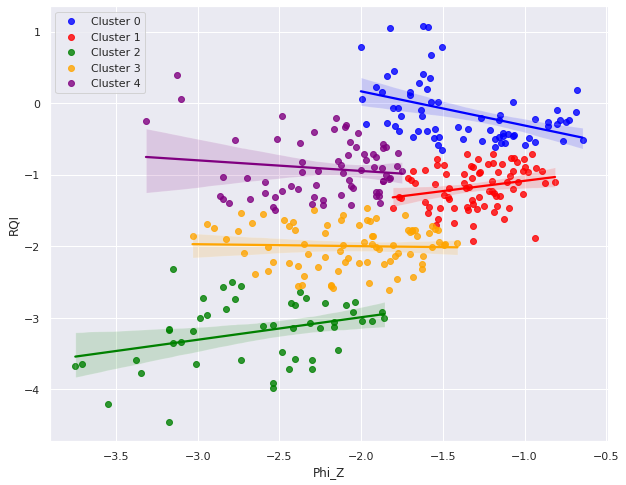

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, cluster in df_pred.groupby('cluster'):
    sns.regplot(x=cluster['Phi_Z'], y=cluster['RQI'], color=colors[i], label=f'Cluster {i}', ax=ax)



ax.set_xlabel('Phi_Z')
ax.set_ylabel('RQI')
ax.legend()
plt.show()

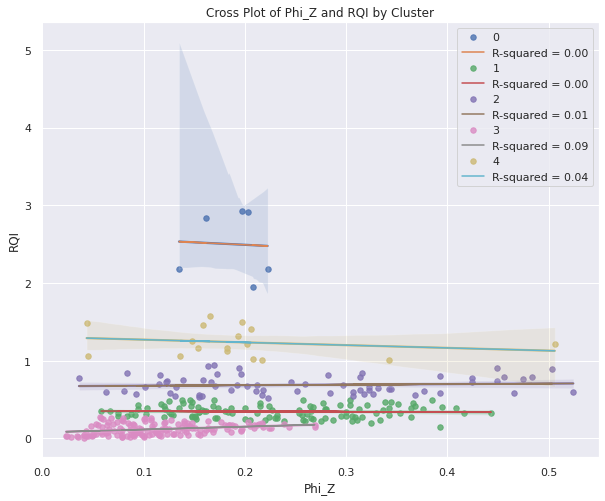

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']

# Import data
data = df_pred

# Group data by cluster
groups = data.groupby('cluster')

# Create scatter plot for each cluster
for name, group in groups:
    # Fit linear regression
    reg = LinearRegression().fit(group[['Phi_Z']], group[['RQI']])
    # Calculate R-squared
    score = reg.score(group[['Phi_Z']], group[['RQI']])
    # Add scatter plot and regression line to plot
    sns.regplot(x='Phi_Z', y='RQI', data=group, label=name, scatter_kws={'s': 30})
    plt.plot(group['Phi_Z'], reg.predict(group[['Phi_Z']]), label='R-squared = {:.2f}'.format(score))
    plt.legend()
    plt.title('Cross Plot of Phi_Z and RQI by Cluster')
    plt.xlabel('Phi_Z')
    plt.ylabel('RQI')

# Show plot
plt.show()

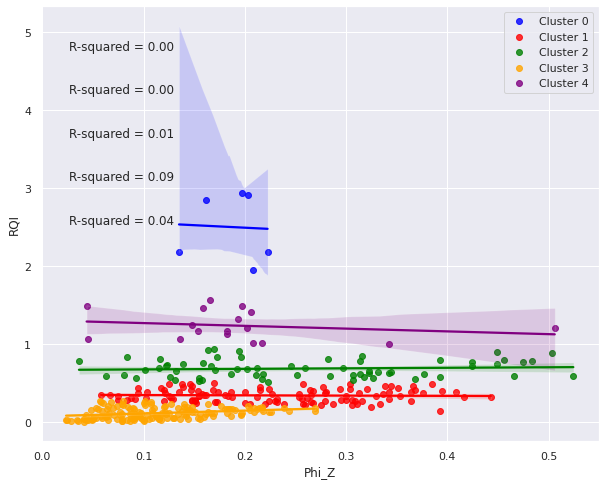

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, cluster in df_pred.groupby('cluster'):
    sns.regplot(x=cluster['Phi_Z'], y=cluster['RQI'], color=colors[i], label=f'Cluster {i}', ax=ax)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=cluster['Phi_Z'], y=cluster['RQI'])
    ax.text(0.05, 0.9-i*0.1, f"R-squared = {r_value**2:.2f}", transform=ax.transAxes)

ax.set_xlabel('Phi_Z')
ax.set_ylabel('RQI')
ax.legend()
plt.show()

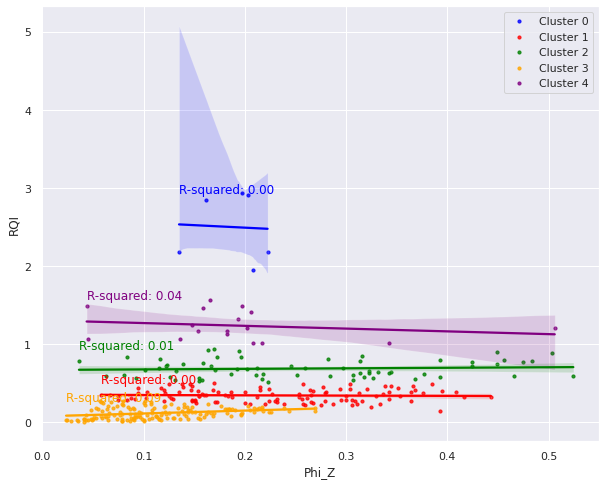

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, cluster in df_pred.groupby('cluster'):
    sns.regplot(x=cluster['Phi_Z'], y=cluster['RQI'], color=colors[i], label=f'Cluster {i}', ax=ax, scatter_kws={'s': 10})
    
    # Fit linear regression and calculate R-squared
    lr = LinearRegression()
    X = cluster[['Phi_Z']]
    y = cluster['RQI']
    lr.fit(X, y)
    score = lr.score(X, y)
    
    # Add regression score to the plot
    plt.text(X.min(), y.max(), f'R-squared: {score:.2f}', fontsize=12, color=colors[i])

ax.set_xlabel('Phi_Z')
ax.set_ylabel('RQI')
ax.legend()
plt.show()


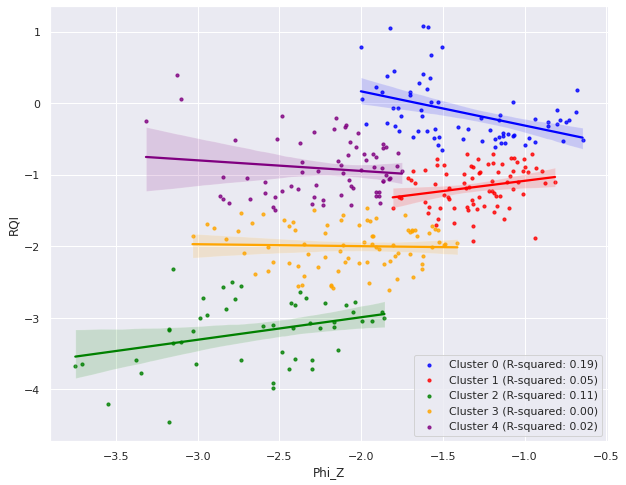

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, cluster in df_pred.groupby('cluster'):
    sns.regplot(x=cluster['Phi_Z'], y=cluster['RQI'], color=colors[i], label=f'Cluster {i} (R-squared: {LinearRegression().fit(cluster[["Phi_Z"]], cluster["RQI"]).score(cluster[["Phi_Z"]], cluster["RQI"]):.2f})', ax=ax, scatter_kws={'s': 10})

ax.set_xlabel('Phi_Z')
ax.set_ylabel('RQI')
ax.legend()
plt.show()


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

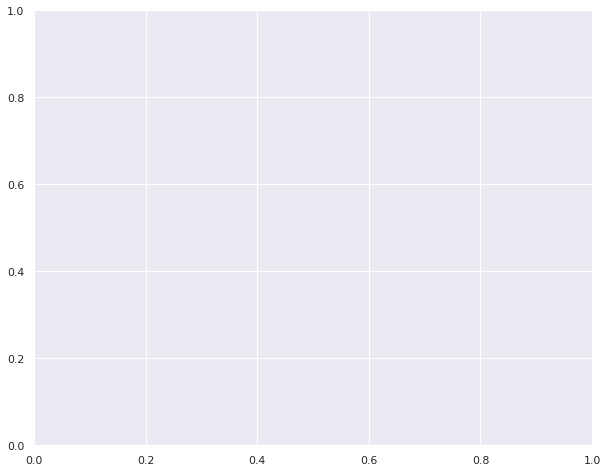

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, cluster in df_pred.groupby('cluster'):
    x = cluster['Phi_Z']
    y = cluster['RQI']
    log_x = np.log10(x)
    log_y = np.log10(y)
    sns.regplot(x=log_x, y=log_y, color=colors[i], label=f'Cluster {i} (R-squared: {LinearRegression().fit(log_x.values.reshape(-1, 1), log_y.values.reshape(-1, 1)).score(log_x.values.reshape(-1, 1), log_y.values.reshape(-1, 1)):.2f})', ax=ax, scatter_kws={'s': 10})

ax.set_xlabel('Phi_Z')
ax.set_ylabel('RQI')
ax.legend()
plt.show()
